## **Business Case** : Analyze Venture capital funding data for some of the popular companies and present insights and observations from the data. 

In [276]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Case Study - VC funding data.xlsx to Case Study - VC funding data (1).xlsx
User uploaded file "Case Study - VC funding data.xlsx" with length 115716 bytes


## Exploratory Data Analysis

In [0]:

# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline

In [0]:
import pandas as pd
xls = pd.ExcelFile('Case Study - VC funding data.xlsx')
df1 = pd.read_excel(xls, 'Funding Data')
df2 = pd.read_excel(xls, 'State Map')

In [279]:
df1.sort_index(ascending=True)
df1.head()

,permalink,company,Employee count,category,city,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock-5,Li feLock,NaN,web,Tempe,39203,6850000.0,USD,b
1,lifelock-3,LifeL ock,NaN,web,Tempe,38991,6000000.0,USD,a
2,NaN,LifeLock,NaN,web,NaN,39448,25000000.0,USD,c
3,mycityfaces-4,MyCityFaces,7.0,web,Scottsdale,39448,50000.0,USD,seed
4,flypaper-3,Flypap er,NaN,web,Phoenix,39479,3000000.0,USD,a


In [281]:
df2["city"] = df2['city'].str.replace('[^\w\s]','')
df2['city']=df2['city'].str[:-3]
df2.head()


,city,state
0,Gilb,AZ
1,Phoe,AZ
2,Scottsd,AZ
3,Scottsd,AZ
4,Scottsd,AZ


In [282]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
permalink         1456 non-null object
company           1460 non-null object
Employee count    567 non-null float64
category          1436 non-null object
city              1423 non-null object
fundedDate        1460 non-null int64
raisedAmt         1460 non-null float64
raisedCurrency    1460 non-null object
round             1460 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 102.7+ KB


In [283]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
city     1460 non-null object
state    1460 non-null object
dtypes: object(2)
memory usage: 22.9+ KB


In [0]:
Data=pd.merge(df1,df2,left_index=True,right_index=True)

In [285]:
Data.head()

,permalink,company,Employee count,category,city_x,fundedDate,raisedAmt,raisedCurrency,round,city_y,state
0,lifelock-5,Li feLock,NaN,web,Tempe,39203,6850000.0,USD,b,Gilb,AZ
1,lifelock-3,LifeL ock,NaN,web,Tempe,38991,6000000.0,USD,a,Phoe,AZ
2,NaN,LifeLock,NaN,web,NaN,39448,25000000.0,USD,c,Scottsd,AZ
3,mycityfaces-4,MyCityFaces,7.0,web,Scottsdale,39448,50000.0,USD,seed,Scottsd,AZ
4,flypaper-3,Flypap er,NaN,web,Phoenix,39479,3000000.0,USD,a,Scottsd,AZ


In [286]:
Data.isna().any()

permalink          True
company           False
Employee count     True
category           True
city_x             True
fundedDate        False
raisedAmt         False
raisedCurrency    False
round             False
city_y            False
state             False
dtype: bool

In [287]:
Data.rename(columns={'Employee count': 'Employee_count'}, inplace=True)
Data.columns

Index(['permalink', 'company', 'Employee_count', 'category', 'city_x',
       'fundedDate', 'raisedAmt', 'raisedCurrency', 'round', 'city_y',
       'state'],
      dtype='object')

In [288]:
Data['company']  = Data['company'].str.replace(" ","")
Data['permalink']  = Data['permalink'].str.replace(" ","")
Data.head()

,permalink,company,Employee_count,category,city_x,fundedDate,raisedAmt,raisedCurrency,round,city_y,state
0,lifelock-5,LifeLock,NaN,web,Tempe,39203,6850000.0,USD,b,Gilb,AZ
1,lifelock-3,LifeLock,NaN,web,Tempe,38991,6000000.0,USD,a,Phoe,AZ
2,NaN,LifeLock,NaN,web,NaN,39448,25000000.0,USD,c,Scottsd,AZ
3,mycityfaces-4,MyCityFaces,7.0,web,Scottsdale,39448,50000.0,USD,seed,Scottsd,AZ
4,flypaper-3,Flypaper,NaN,web,Phoenix,39479,3000000.0,USD,a,Scottsd,AZ


## Data Cleaning 

In [0]:
Main=Data

In [291]:
# Main.drop(['raisedAmt'], axis=1, inplace=True)
print("all_data size is : {}".format(Main.shape))

all_data size is : (1460, 11)


In [295]:
all_data_na = (Main.isnull().sum() / len(Main)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
Employee_count,61.164384
city_x,2.534247
category,1.643836
permalink,0.273973


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


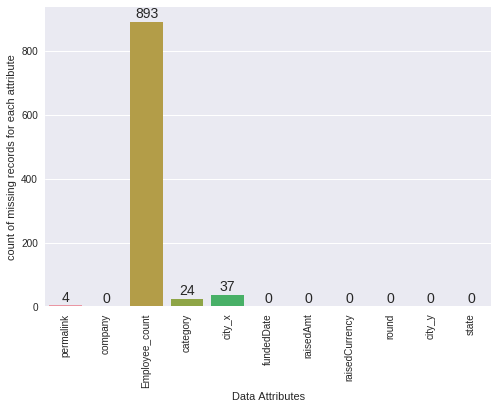

In [296]:
# Graphical representation of the missing values.
x = Main.columns
y = Main.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [297]:
# Actual replacement of the missing value using median value.
Data_median = Data.fillna((Data.mean()))
Data_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
permalink         1456 non-null object
company           1460 non-null object
Employee_count    1460 non-null float64
category          1436 non-null object
city_x            1423 non-null object
fundedDate        1460 non-null int64
raisedAmt         1460 non-null float64
raisedCurrency    1460 non-null object
round             1460 non-null object
city_y            1460 non-null object
state             1460 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 125.5+ KB


In [298]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
Data_median.isnull().sum()

permalink          4
company            0
Employee_count     0
category          24
city_x            37
fundedDate         0
raisedAmt          0
raisedCurrency     0
round              0
city_y             0
state              0
dtype: int64

In [299]:
pd.unique(Data_median[['company']].values.ravel('K'))

array(['LifeLock', 'MyCityFaces', 'Flypaper', 'Infusionsoft', 'gAuto',
       'ChosenList.com', 'Digg', 'Facebook', 'Photobucket', 'Omnidrive',
       'Geni', 'Twitter', 'StumbleUpon', 'Gizmoz', 'Scribd', 'Slacker',
       'Lala', 'Plaxo', 'Powerset', 'Technorati', 'Mahalo', 'Kyte',
       'Veoh', 'JingleNetworks', 'Ning', 'JotSpot', 'Mercora', 'Wesabe',
       'Jangl', 'Hyphen8', 'Prosper', 'Google', 'Jajah', 'YouTube',
       'Ustream', 'GizmoProject', 'Adap.tv', 'Topix', 'Revision3',
       'AggregateKnowledge', 'SugarInc', 'Zing', 'CriticalMetrics',
       'Spock', 'Wize', 'SodaHead', 'CastTV', 'BuzzNet', 'FunnyOrDie',
       'Sphere', 'MeeVee', 'Mashery', 'Yelp', 'Spotplex', 'Coghead',
       'Zooomr', 'SideStep', 'RockYou', 'Pageflakes', 'Swivel', 'Slide',
       'Bebo', 'freebase', 'MetawebTechnologies', 'GlamMedia', 'TheFind',
       'Zazzle', 'Dogster', 'Pandora', 'Cafepress', 'pbwiki', 'AdBrite',
       'Loomia', 'Meebo', 'Eventbrite', 'LinkedIn', 'FlickIM', 'Terabitz',
     

In [0]:
for col in ('category', 'city_x','permalink'):
    Data_median[col] = Data_median[col].fillna('None')

In [301]:
Data_median.isna()

,permalink,company,Employee_count,category,city_x,fundedDate,raisedAmt,raisedCurrency,round,city_y,state
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [302]:
Data_median.head()

,permalink,company,Employee_count,category,city_x,fundedDate,raisedAmt,raisedCurrency,round,city_y,state
0,lifelock-5,LifeLock,95.72134,web,Tempe,39203,6850000.0,USD,b,Gilb,AZ
1,lifelock-3,LifeLock,95.72134,web,Tempe,38991,6000000.0,USD,a,Phoe,AZ
2,None,LifeLock,95.72134,web,None,39448,25000000.0,USD,c,Scottsd,AZ
3,mycityfaces-4,MyCityFaces,7.00000,web,Scottsdale,39448,50000.0,USD,seed,Scottsd,AZ
4,flypaper-3,Flypaper,95.72134,web,Phoenix,39479,3000000.0,USD,a,Scottsd,AZ


In [303]:
all_data_na = (Data_median.isnull().sum() / len(Data_median)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


In [305]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
Data_median.isnull().sum()

permalink         0
company           0
Employee_count    0
category          0
city_x            0
fundedDate        0
raisedAmt         0
raisedCurrency    0
round             0
city_y            0
state             0
dtype: int64

In [306]:
pd.unique(Data_median[['permalink']].values.ravel('K'))

array(['lifelock-5', 'lifelock-3', 'None', ..., 'myrio-2',
       'grid-networks-7', 'grid-networks-3'], dtype=object)

In [307]:
Data_median['fundedDate'] = pd.to_datetime((Data_median['fundedDate'] - 25569) * 86400.0, unit='s')

Data_median.head()


,permalink,company,Employee_count,category,city_x,fundedDate,raisedAmt,raisedCurrency,round,city_y,state
0,lifelock-5,LifeLock,95.72134,web,Tempe,2007-05-01,6850000.0,USD,b,Gilb,AZ
1,lifelock-3,LifeLock,95.72134,web,Tempe,2006-10-01,6000000.0,USD,a,Phoe,AZ
2,None,LifeLock,95.72134,web,None,2008-01-01,25000000.0,USD,c,Scottsd,AZ
3,mycityfaces-4,MyCityFaces,7.00000,web,Scottsdale,2008-01-01,50000.0,USD,seed,Scottsd,AZ
4,flypaper-3,Flypaper,95.72134,web,Phoenix,2008-02-01,3000000.0,USD,a,Scottsd,AZ


## Statistical and Visualization

In [309]:
Data_median.describe()

,Employee_count,raisedAmt
count,1460.000000,1.460000e+03
mean,95.721340,1.013149e+07
std,540.333895,1.866146e+07
min,0.000000,6.000000e+03
25%,35.000000,2.000000e+06
50%,95.721340,5.500000e+06
75%,95.721340,1.102500e+07
max,20000.000000,3.000000e+08


In [310]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = Data_median.corr()
corr.head()

,Employee_count,raisedAmt
Employee_count,1.000000,0.094587
raisedAmt,0.094587,1.000000


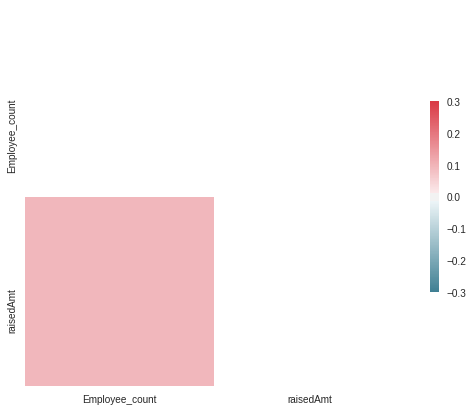

In [311]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
Data_median.to_excel('Data_median.xlsx')
from google.colab import files
files.download('Data_median.xlsx')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


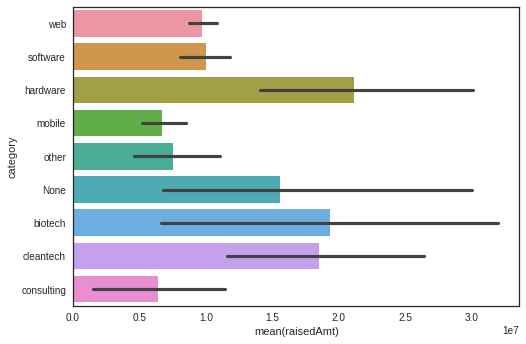

In [313]:
ax = sns.barplot(y="category", x="raisedAmt", data=Data_median )
sns.set(rc={'figure.figsize':(14,8)})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


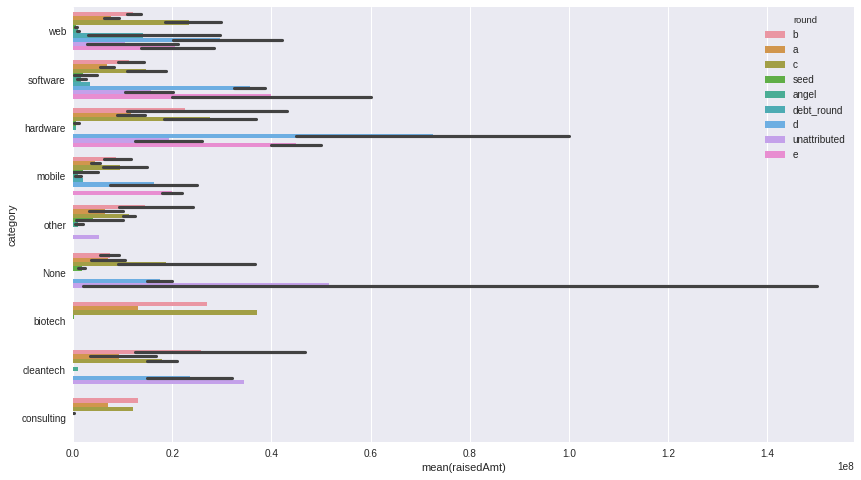

In [314]:

ax = sns.barplot(y="category", x="raisedAmt", data=Data_median ,hue='round')
sns.set(rc={'figure.figsize':(16,12)})

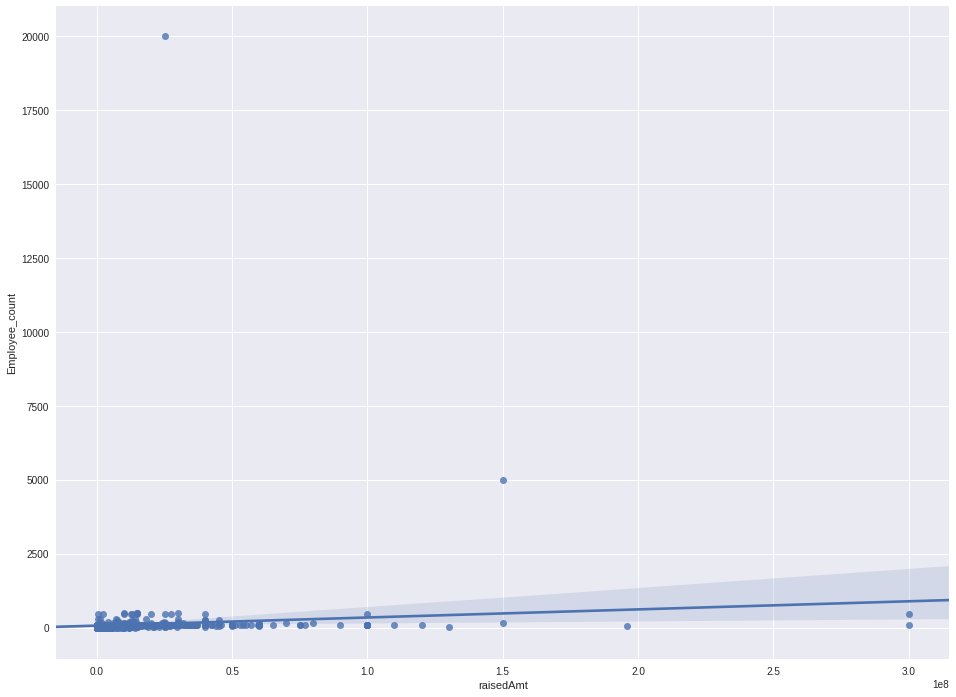

In [315]:
sns.regplot(x="raisedAmt", y="Employee_count",data=Data_median);
sns.set(rc={'figure.figsize':(16,12)})

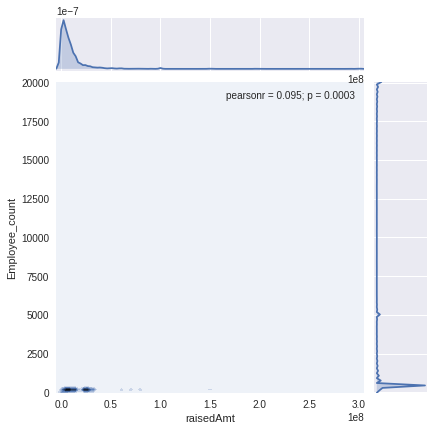

In [316]:
sns.jointplot(x="raisedAmt", y="Employee_count", data=Data_median,kind="kde")